In [1]:
import numpy as np
import pandas as pd
import os
import glob
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_colwidth", 200)
pd.set_option("display.max_row", 500)

In [2]:
RESULT_DIR = "/Users/hasnainmamdani/Academics/McGill/thesis/stroke-impairment-analysis/regression/results_remote"

In [28]:
def plot_scores(score_df, metric, score_type, title="", save_folder="", col_order=None, hue_order=None):

    g = sns.catplot(x="Domain", y="Score", hue="alpha", col="Data mul factor", col_order=col_order,
                    data=score_df, ci="sd", kind="bar", hue_order=hue_order,
                    row_order=[100.0, 80.0, 60.0, 40.0, 20.0])

    g.set_axis_labels("", "Score (Mean and Standard Deviation across 5 CV folds)")

    for i, ax in enumerate(g.fig.axes):
        ax.set_xticklabels(ax.get_xticklabels(), rotation=65)
        ax.axhline(0, color="black")

    g.fig.suptitle(title, y=1.08, fontsize=30)
    
    if metric == "R2" and score_type == "Out-of-sample":
        g.set(ylim=(-1, 0.2))
#         plt.savefig(save_folder + title, bbox_inches="tight")
#         pass
        
    if metric == "R2" and (score_type == "In-sample" or score_type == "In-sample (original)"):
        g.set(ylim=(-0.05, 1.0))
        for i, ax in enumerate(g.fig.axes):
            ax.axhline(0.1, color="black")
            ax.axhline(0.2, color="black")
        
    if metric == "MAE":
        g.set(ylim=(0.0, 1.6))
        for i, ax in enumerate(g.fig.axes):
            ax.axhline(0.6, color="black")
        
    plt.show()
#     plt.savefig(save_folder + title, bbox_inches="tight")


def plot_all_scores(score_df, title_prefix="", save_folder="", col_order=None, hue_order=None):   

    for metric in score_df["Metric"].unique():

        for score_type in np.sort(score_df["Score type"].unique()):
            
            for model in score_df["Model"].unique():

                filtered_data = score_df[(score_df["Metric"] == metric) & (score_df["Score type"] == score_type) 
                                         & (score_df["Model"] == model)]
                
                if score_type == "In-sample (original)":
                    filtered_data = filtered_data[filtered_data["alpha"] != "No mixup"]
                    col_order_new=["5x", "10x"]
                else:
                    col_order_new = col_order

                title = title_prefix + model + " - " + metric + " - " + score_type

                plot_scores(filtered_data, metric, score_type, title, save_folder, col_order=col_order_new, hue_order=hue_order)

In [4]:
# utility to load results
def load_dfs(direc, regex):
    path = RESULT_DIR + direc
    filenames = glob.glob(os.path.join(path, regex))
    filenames.sort()

    res = []
    bps = []
    for fn in filenames:
        if "best-params-" in fn:
            bp = pd.read_hdf(fn, key='p', mode='r')
#             print(bp["% Data (train)"].unique(), bp["Data mul factor"].unique(), bp["alpha"].unique())
            print(bp["Data mul factor"].unique(), bp["alpha"].unique())
            bps.append(bp)
        else:
            res.append(pd.read_hdf(fn, key='p', mode='r'))

    print(len(res), len(bps))
    return res, bps

## 1- Multiitask Ridge

In [5]:
mridlist, mbpridlist = load_dfs("", "*multioutput*mridge*")

['No mixup' '5x' '10x'] ['No mixup' 0.01 0.1]
['5x' '10x'] [0.3 1. ]
2 2


In [23]:
mridge = pd.concat(mridlist, ignore_index=True)
bpmridge = pd.concat(mbpridlist, ignore_index=True)

In [24]:
bpmridge

,Data mul factor,alpha,Model,Fold,Best params
0,No mixup,No mixup,Multitask Ridge,1,{'alpha': 4.9}
1,No mixup,No mixup,Multitask Ridge,2,{'alpha': 4.3999999999999995}
2,No mixup,No mixup,Multitask Ridge,3,{'alpha': 4.0}
3,No mixup,No mixup,Multitask Ridge,4,{'alpha': 3.7}
4,No mixup,No mixup,Multitask Ridge,5,{'alpha': 4.9}
5,5x,0.01,Multitask Ridge,1,{'alpha': 0.003}
6,5x,0.01,Multitask Ridge,2,{'alpha': 0.003}
7,5x,0.01,Multitask Ridge,3,{'alpha': 0.003}
8,5x,0.01,Multitask Ridge,4,{'alpha': 0.003}
9,5x,0.01,Multitask Ridge,5,{'alpha': 0.003}


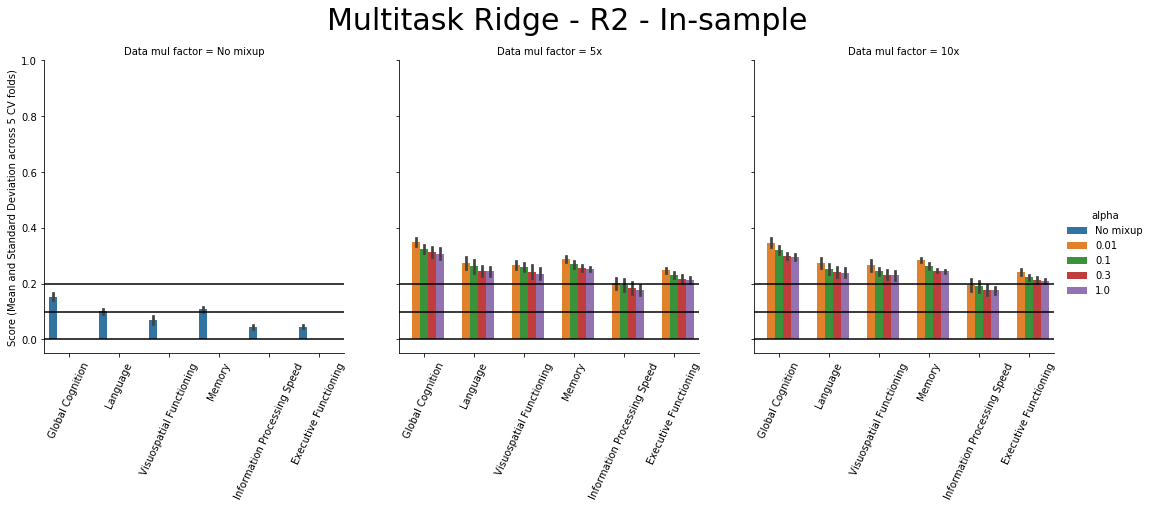

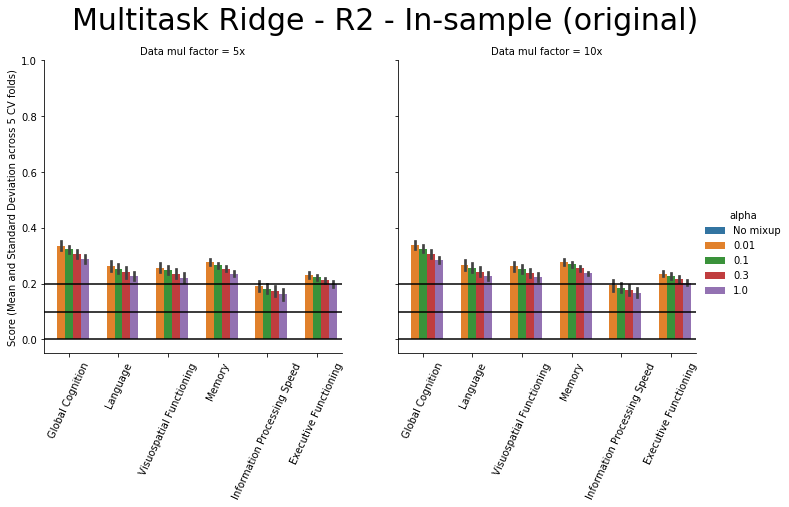

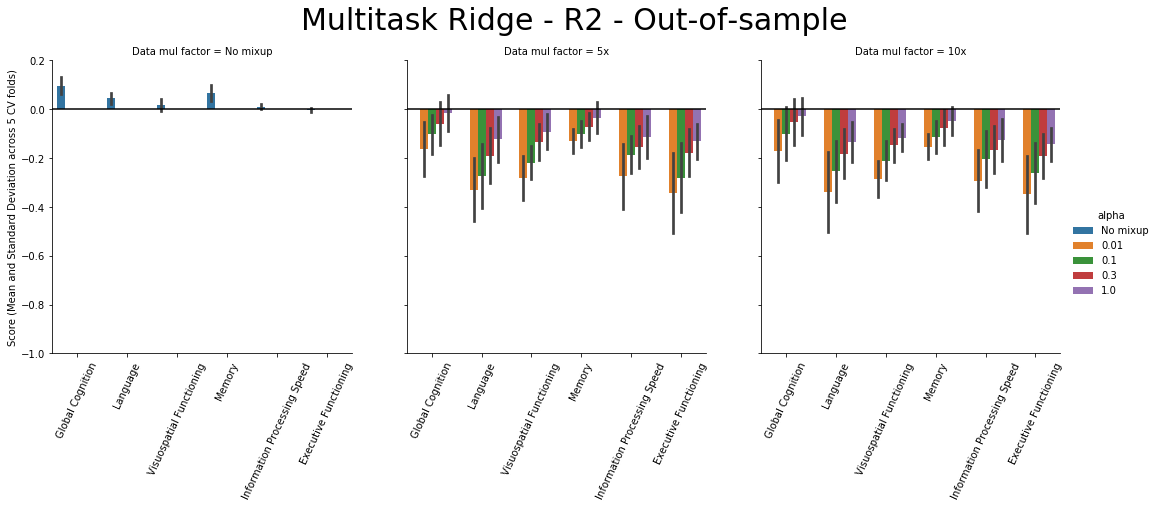

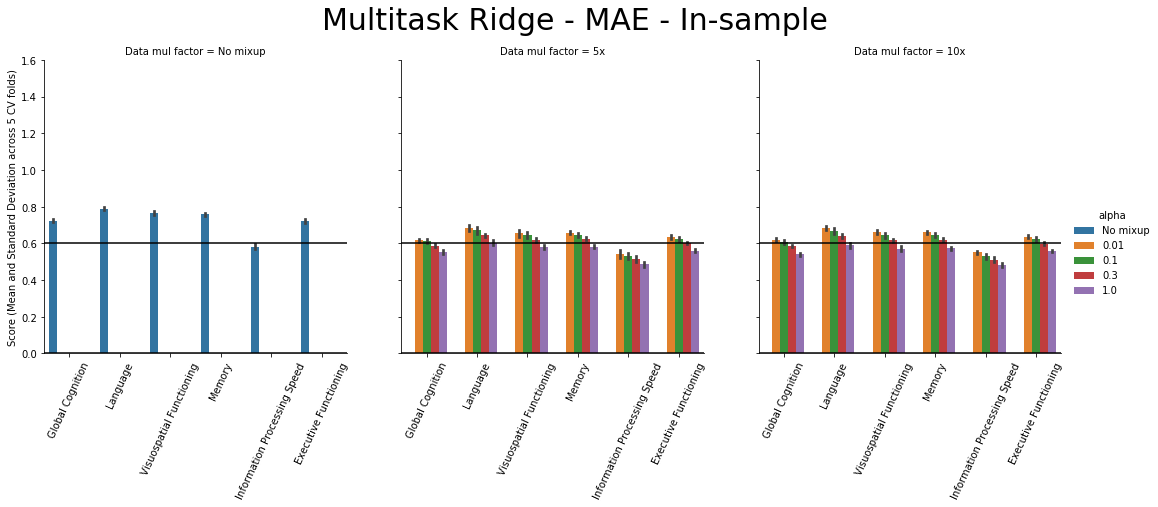

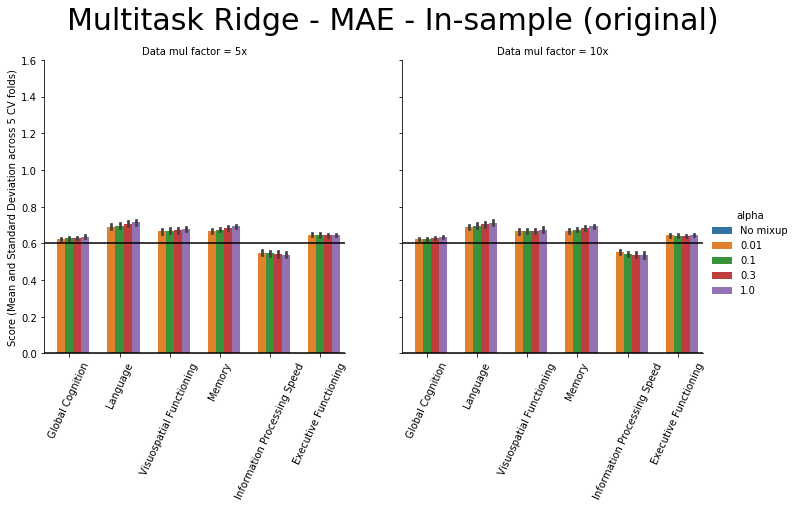

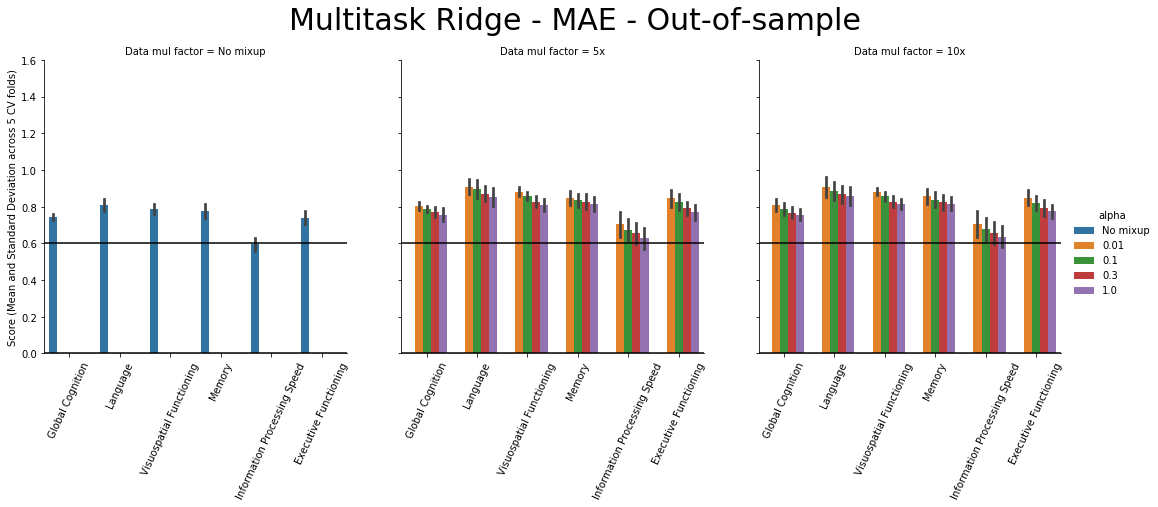

In [8]:
plot_all_scores(mridge, col_order=["No mixup", "5x", "10x"], hue_order=["No mixup", 0.01, 0.1, 0.3, 1.0])

## 2- PLS

In [9]:
plslist, bpplslist = load_dfs("", "*multioutput*pls*")

['No mixup' '5x' '10x'] ['No mixup' 0.01 0.1 0.3 1.0]
1 1


In [10]:
pls = pd.concat(plslist, ignore_index=True)
bppls = pd.concat(bpplslist, ignore_index=True)

In [11]:
bppls

,Data mul factor,alpha,Model,Fold,Best params
0,No mixup,No mixup,PLS,1,{'n_components': 2}
1,No mixup,No mixup,PLS,2,{'n_components': 1}
2,No mixup,No mixup,PLS,3,{'n_components': 1}
3,No mixup,No mixup,PLS,4,{'n_components': 2}
4,No mixup,No mixup,PLS,5,{'n_components': 2}
5,5x,0.01,PLS,1,{'n_components': 6}
6,5x,0.01,PLS,2,{'n_components': 6}
7,5x,0.01,PLS,3,{'n_components': 6}
8,5x,0.01,PLS,4,{'n_components': 6}
9,5x,0.01,PLS,5,{'n_components': 6}


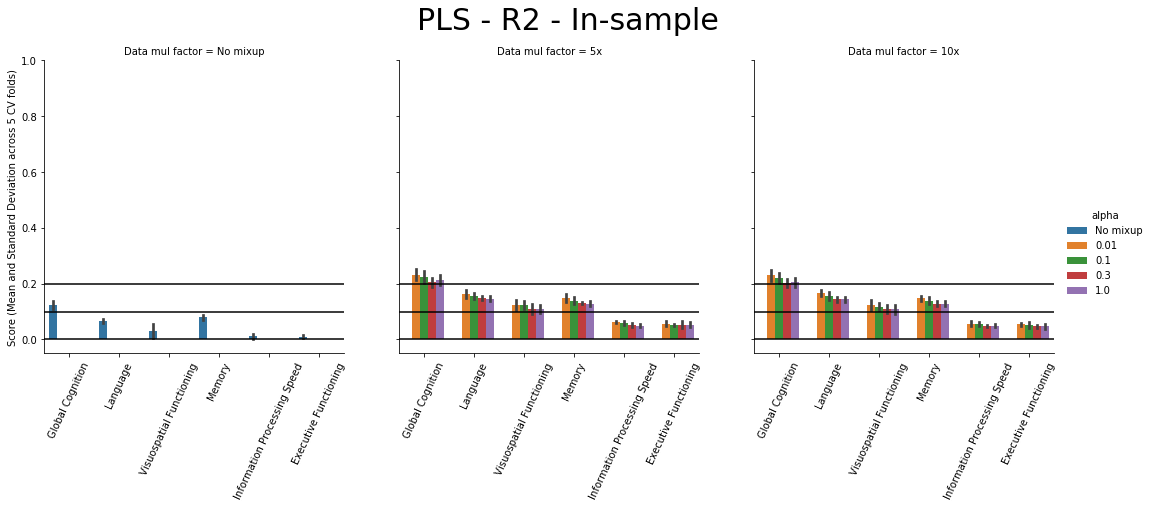

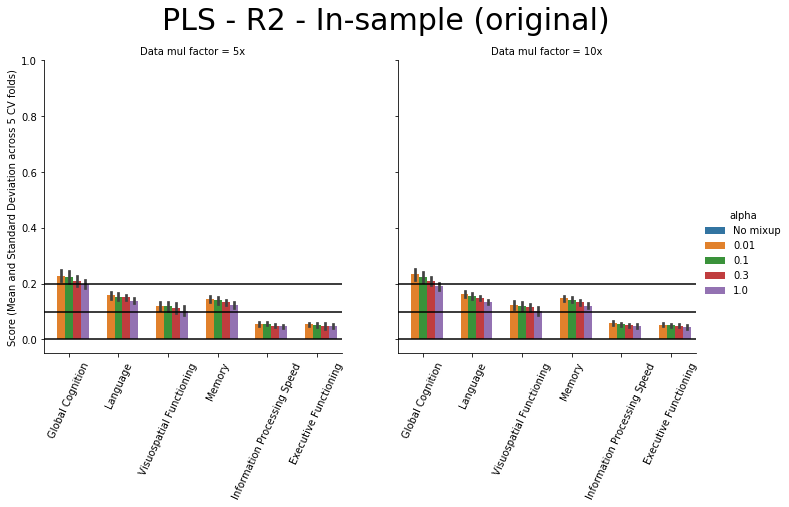

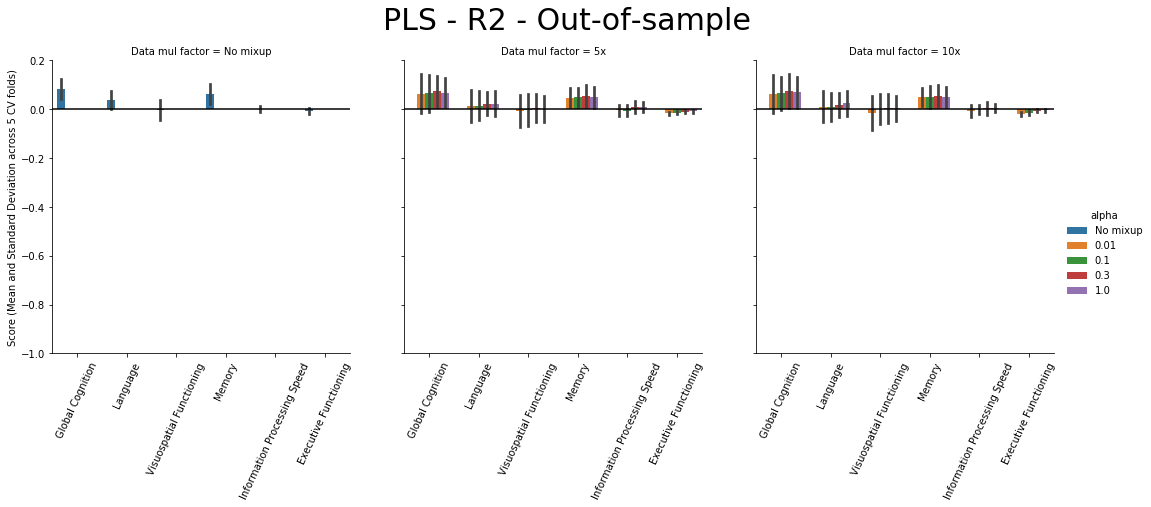

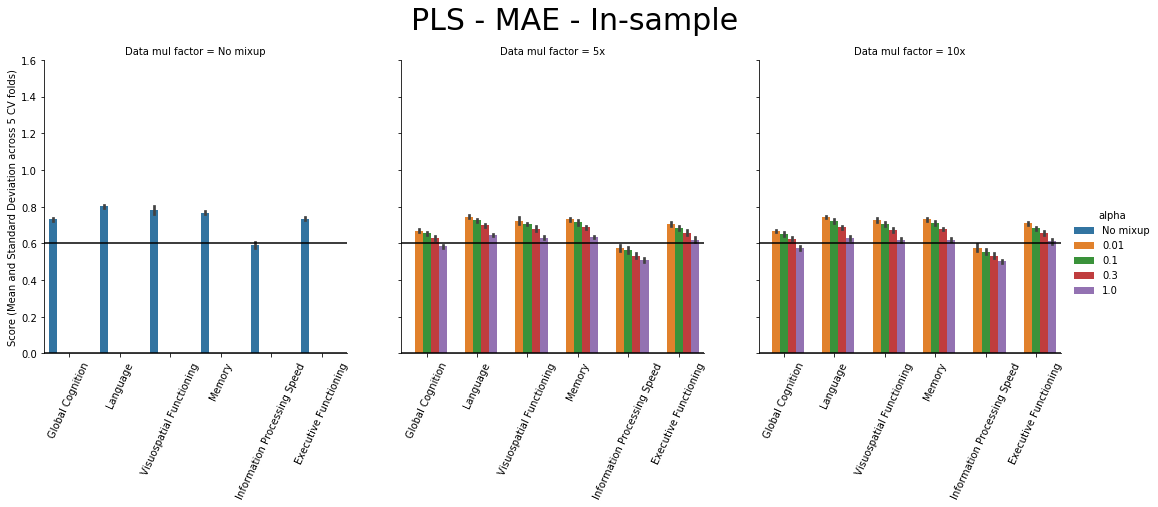

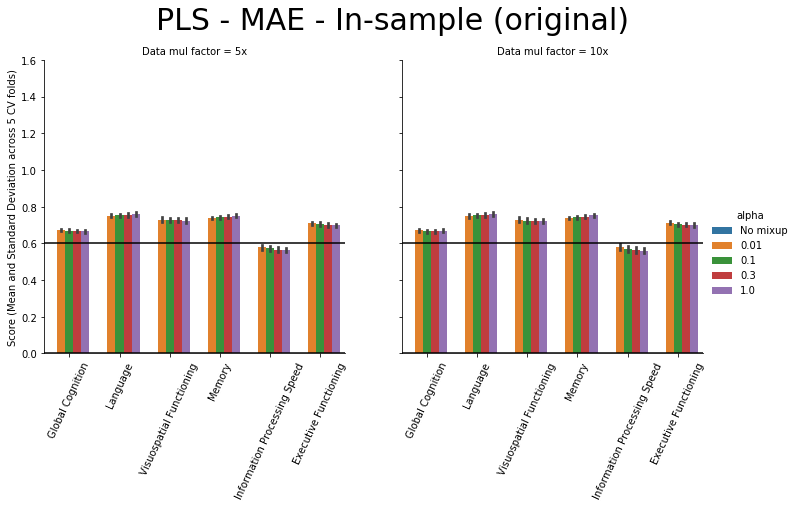

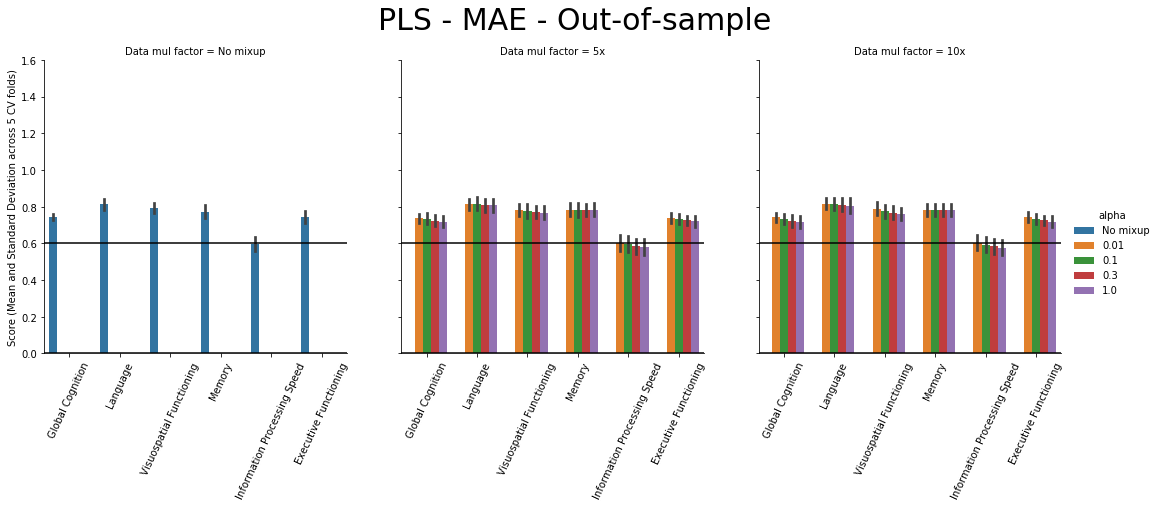

In [12]:
plot_all_scores(pls, col_order=["No mixup", "5x", "10x"], hue_order=["No mixup", 0.01, 0.1, 0.3, 1.0])

## 3- CCA

In [13]:
ccalist, bpccalist = load_dfs("", "*multioutput*cca*")

['No mixup' '5x' '10x'] ['No mixup' 0.01 0.1 0.3 1.0]
1 1


In [15]:
cca = pd.concat(ccalist, ignore_index=True)
bpcca = pd.concat(bpccalist, ignore_index=True)

In [16]:
bpcca

,Data mul factor,alpha,Model,Fold,Best params
0,No mixup,No mixup,CCA,1,{'n_components': 1}
1,No mixup,No mixup,CCA,2,{'n_components': 1}
2,No mixup,No mixup,CCA,3,{'n_components': 1}
3,No mixup,No mixup,CCA,4,{'n_components': 1}
4,No mixup,No mixup,CCA,5,{'n_components': 1}
5,5x,0.01,CCA,1,{'n_components': 6}
6,5x,0.01,CCA,2,{'n_components': 6}
7,5x,0.01,CCA,3,{'n_components': 6}
8,5x,0.01,CCA,4,{'n_components': 6}
9,5x,0.01,CCA,5,{'n_components': 6}


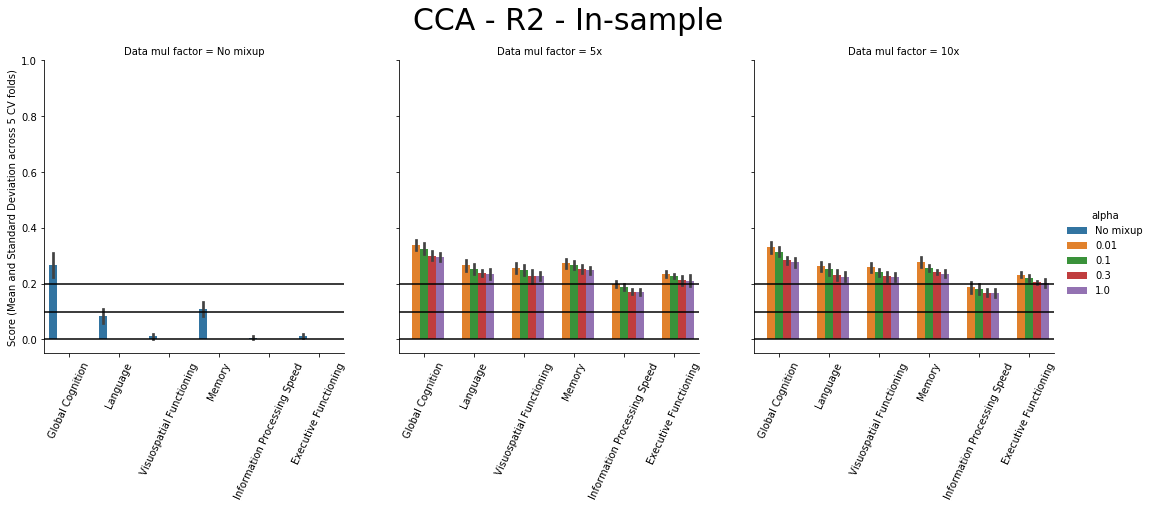

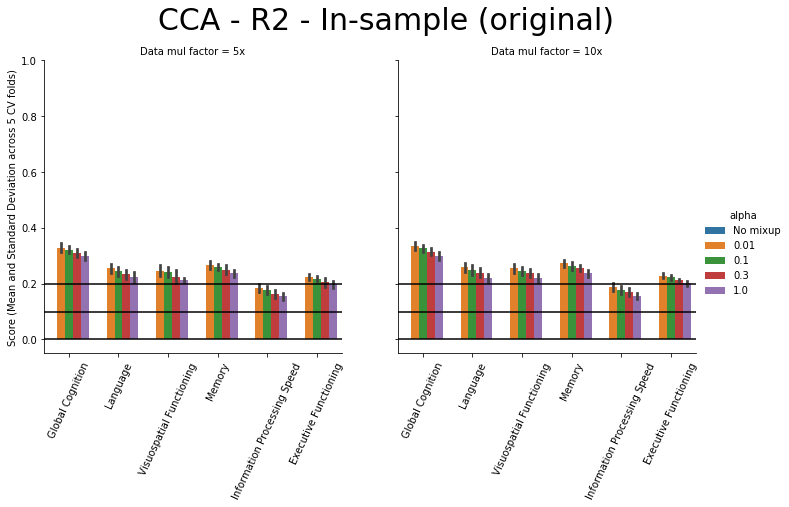

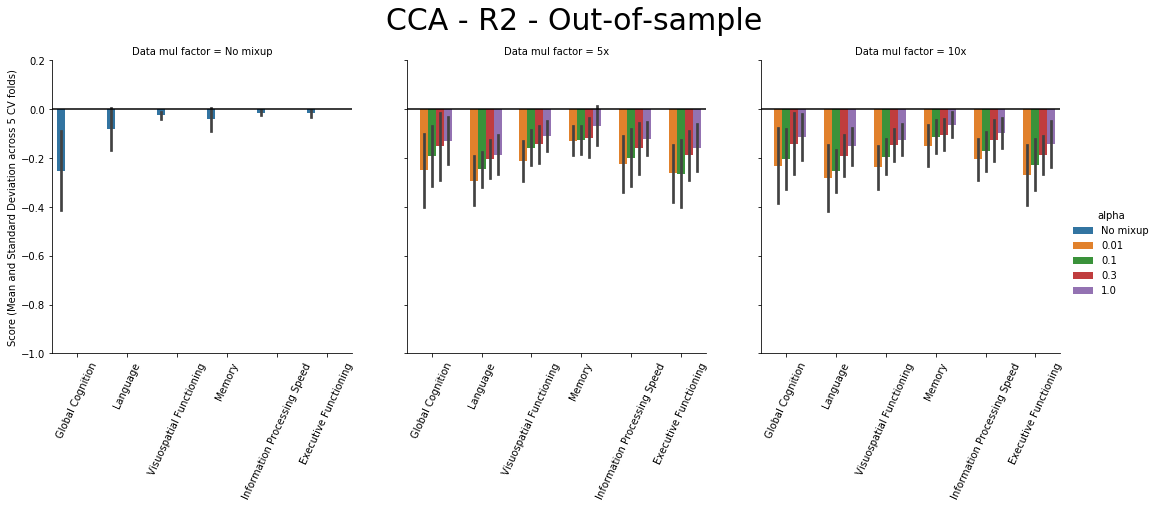

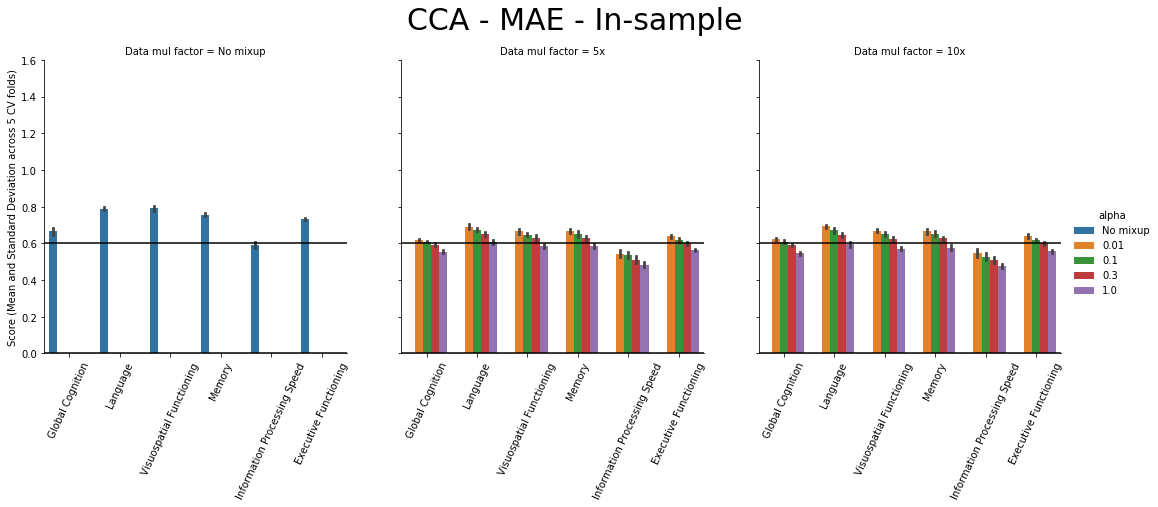

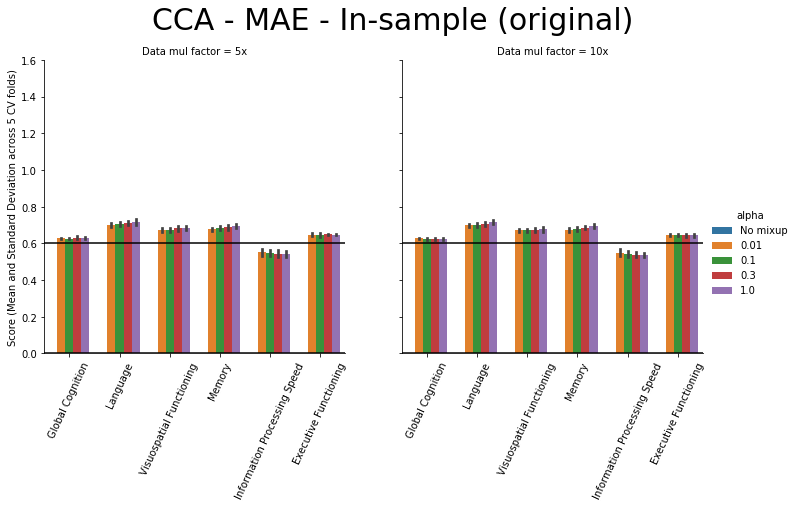

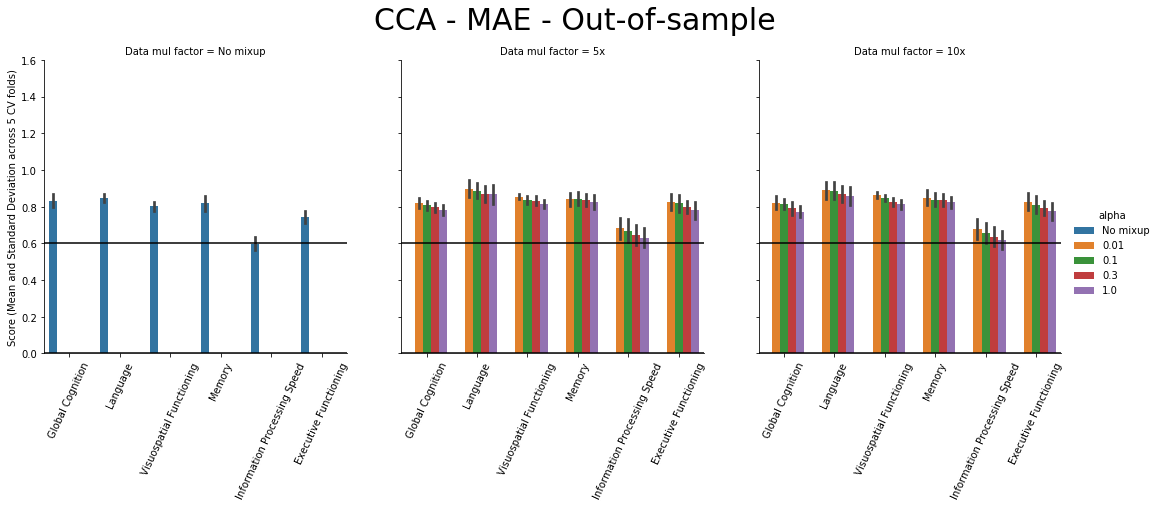

In [17]:
plot_all_scores(cca, col_order=["No mixup", "5x", "10x"], hue_order=["No mixup", 0.01, 0.1, 0.3, 1.0])

## 4- Multioutput Random Forest

In [18]:
rflist, bprflist = load_dfs("","*multioutput*rf*")

['No mixup' '5x' '10x'] ['No mixup' 0.01]
['5x' '10x'] [0.1]
['5x' '10x'] [0.3]
['5x' '10x'] [1.]
4 4


In [20]:
rf = pd.concat(rflist, ignore_index=True)
bprf = pd.concat(bprflist, ignore_index=True)

In [21]:
bprf

,Data mul factor,alpha,Model,Fold,Best params
0,No mixup,No mixup,Random Forest,1,"{'n_estimators': 3000, 'min_samples_split': 7, 'min_samples_leaf': 3, 'max_samples': 0.5, 'max_depth': 10}"
1,No mixup,No mixup,Random Forest,2,"{'n_estimators': 3000, 'min_samples_split': 7, 'min_samples_leaf': 3, 'max_samples': 0.5, 'max_depth': 10}"
2,No mixup,No mixup,Random Forest,3,"{'n_estimators': 3000, 'min_samples_split': 7, 'min_samples_leaf': 3, 'max_samples': 0.5, 'max_depth': 10}"
3,No mixup,No mixup,Random Forest,4,"{'n_estimators': 3000, 'min_samples_split': 7, 'min_samples_leaf': 3, 'max_samples': 0.5, 'max_depth': 10}"
4,No mixup,No mixup,Random Forest,5,"{'n_estimators': 3000, 'min_samples_split': 7, 'min_samples_leaf': 3, 'max_samples': 0.5, 'max_depth': 10}"
5,5x,0.01,Random Forest,1,"{'n_estimators': 3000, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_samples': 0.8, 'max_depth': 275}"
6,5x,0.01,Random Forest,2,"{'n_estimators': 3000, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_samples': 0.8, 'max_depth': 275}"
7,5x,0.01,Random Forest,3,"{'n_estimators': 3000, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_samples': 0.8, 'max_depth': 275}"
8,5x,0.01,Random Forest,4,"{'n_estimators': 3000, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_samples': 0.8, 'max_depth': 275}"
9,5x,0.01,Random Forest,5,"{'n_estimators': 3000, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_samples': 0.8, 'max_depth': 275}"


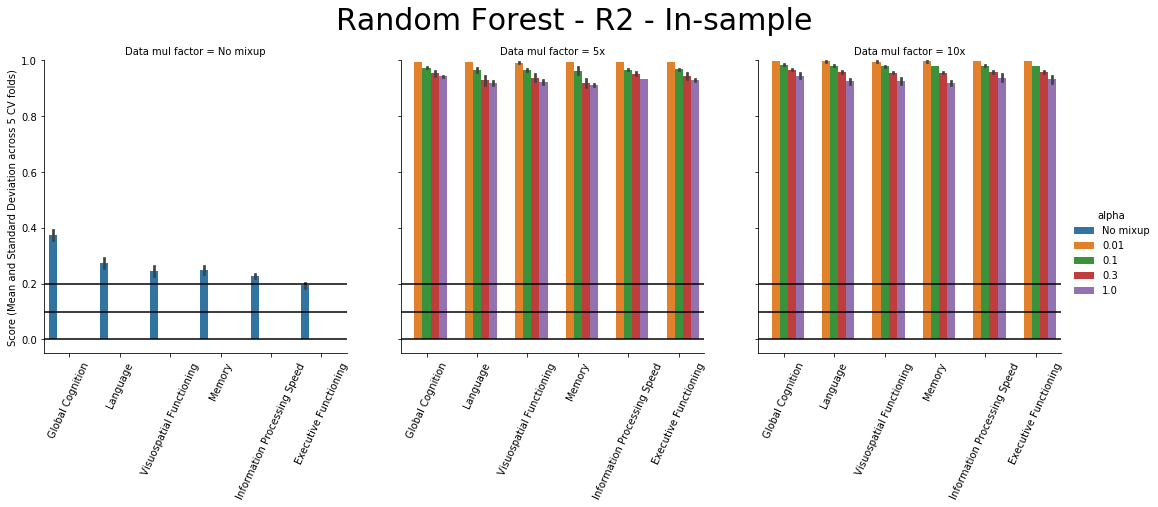

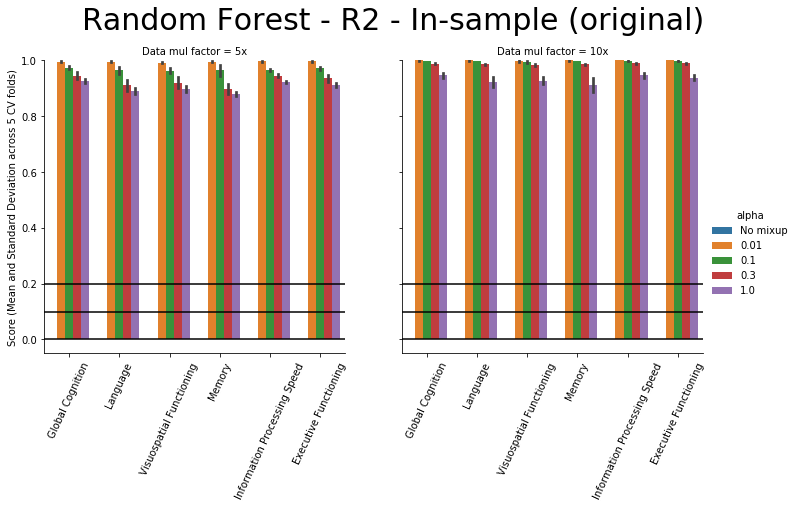

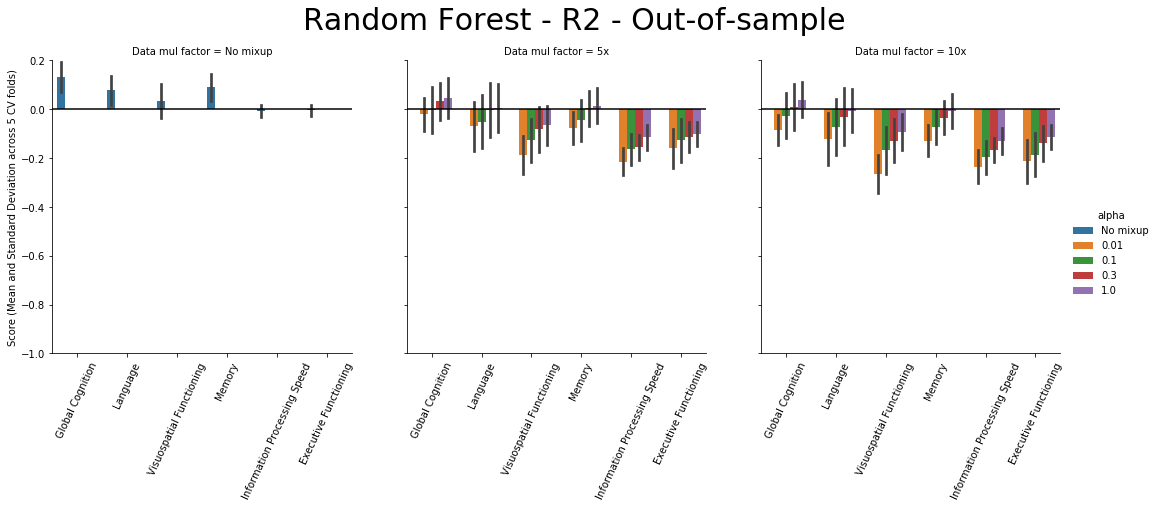

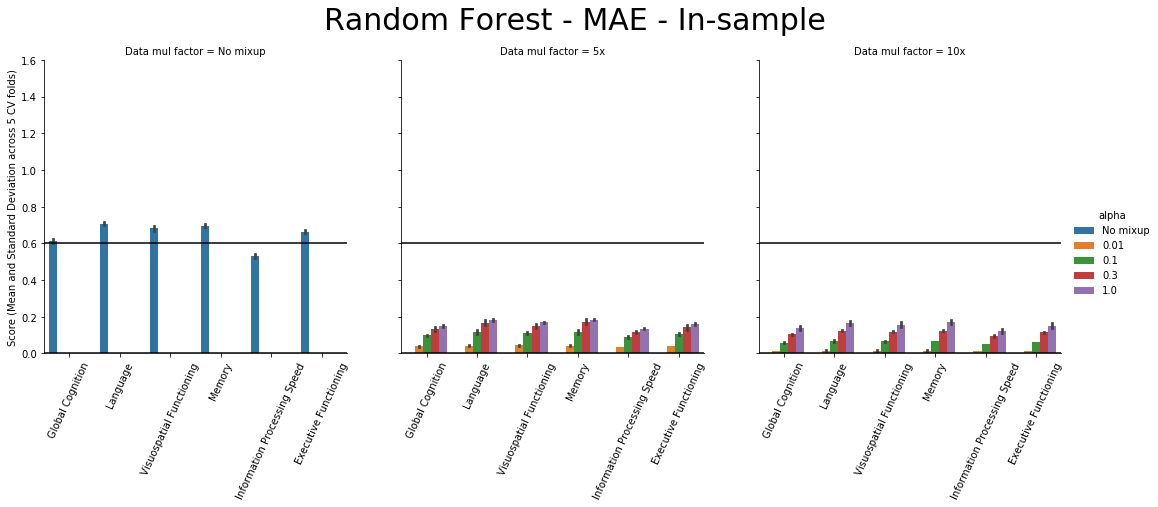

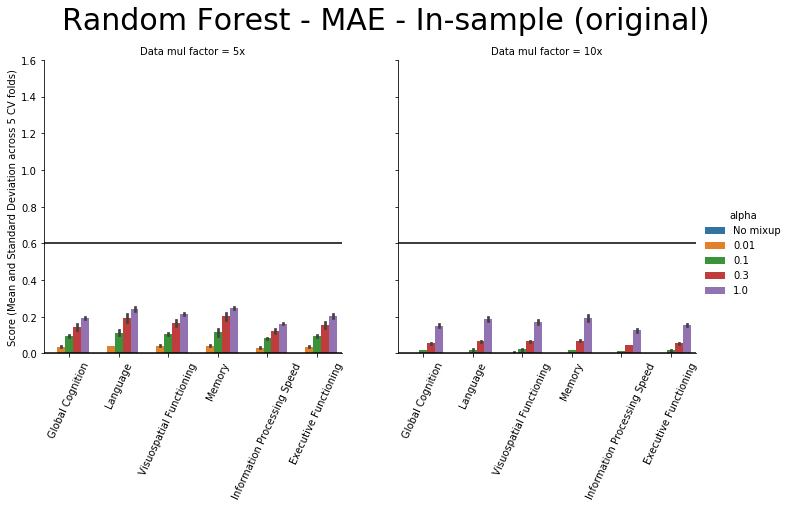

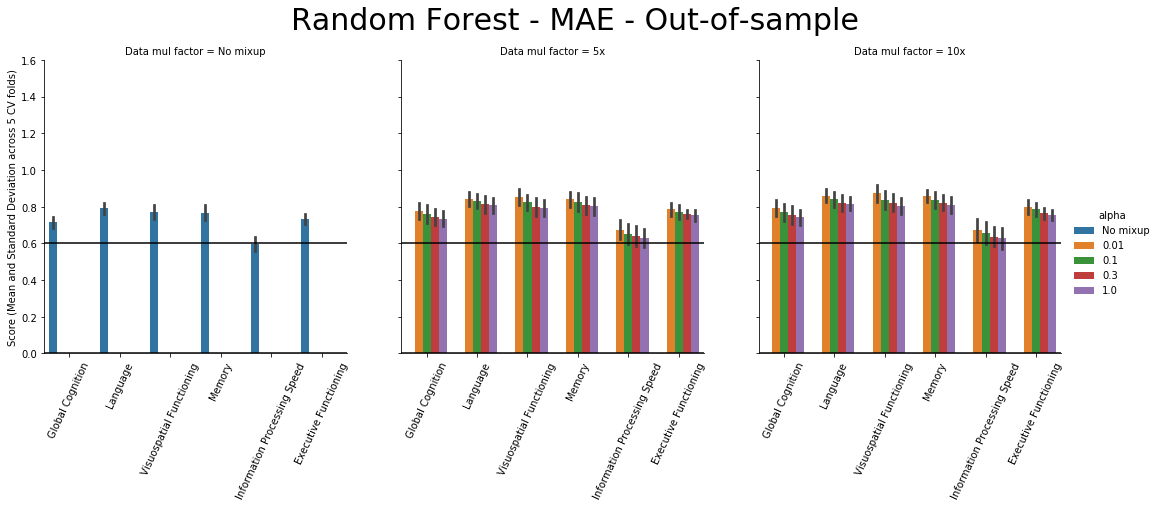

In [22]:
plot_all_scores(rf, col_order=["No mixup", "5x", "10x"], hue_order=["No mixup", 0.01, 0.1, 0.3, 1.0])

In [25]:
allmodels = pd.concat([mridge, pls, cca, rf], ignore_index=True)
bpallmodels = pd.concat([bpmridge, bppls, bpcca, bprf], ignore_index=True)

In [27]:
OUTOUT_DIR = "/Users/hasnainmamdani/Academics/McGill/thesis/stroke-impairment-analysis/regression/"
# allmodels = pd.read_hdf(OUTOUT_DIR + 'results/multioutput/atlas_llm_multioutput_mixup_before_log_all_models.h5, key='p', mode='r')
# bpallmodels = pd.read_hdf(OUTOUT_DIR + 'results/multioutput/best_params_atlas_llm_multioutput_mixup_before_log_all_models.h5'', key='p', mode='r')

allmodels.to_hdf(OUTOUT_DIR + 'results/multioutput/atlas_llm_multioutput_mixup_before_log_all_models.h5', key='p', mode='w')
bpallmodels.to_hdf(OUTOUT_DIR + 'results/multioutput/best_params_atlas_llm_multioutput_mixup_before_log_all_models.h5', key='p', mode='w')

/usr/local/lib/python3.7/site-packages/pandas/core/generic.py:2368: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block0_values] [items->['Data mul factor', 'alpha', 'Model', 'Domain', 'Metric', 'Score type']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)
/usr/local/lib/python3.7/site-packages/pandas/core/generic.py:2368: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block1_values] [items->['Data mul factor', 'alpha', 'Model', 'Best params']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)
